# Módulo 2. Redes neuronales

¡Bienvenidos al segundo módulo! Tras haber visto una pequeña introducción al Deep Learning y haber jugado un poco con TensorFlow implementado una pequeña red neuronal, en este módulo vamos a hacer un pequeñísimo repaso de qué es y cómo funciona una red neuronal. Posteriormente, vamos a estudiar detenidamente cómo aprenden y, por último, resolveréis vuestro primer problema real haciendo uso de redes neuronales con TensorFlow.



# 1. Introducción a las redes neuronales

## 1.1 Descripción de las redes neuronales
Como todos sabéis, las redes neuronales son el corazón de los algoritmos basados en deep learning. De forma sencilla, una red neuronal no es más que un método de aproximación de funciones. De hecho, según el teorma de aproximación universal:

**Una red neuronal con una sola capa oculta es suficiente para representar cualquier función en un determinado rango de valores**, aunque es posible que dicha capa oculta sea tan grande que haga su implementación imposible o que no sea posible encontrar los pesos adecuados.

Si tenemos en cuenta que normalmente cualquier problema que se os ocurra puede ser descompuesto y modelado en forma de funciones matemáticas, de acuerdo con este teorema, las redes neuronales deberían ser capaces de resolver cualquier problema, ¿no?

Bueno, hay dos limitaciones importantes de las redes neuronales:
* Son capaces de aproximar funciones **continuas**
* En un determinado **rango** de valores

Una red neuronal está formada por nodos de procesamiento densamente conectados (veremos posteriormente su similitud con las neuronas cerebrales). Cada nodo puede estar conectado a diferentes nodos en múltiples capas por encima y por debajo de él. Una red neuronal simple tiene una **capa de entrada**, una **capa de salida** y una **capa oculta** entre ellas. Una red con más de tres capas, incluyendo la de entrada y la de salida, se conoce como red de aprendizaje profundo. Cuantas más capas, mayor es la capacidad de reconocer información más compleja. En este tipo de arquitecturas, cada neurona de la capa $i$ se conecta con todas las neuronas de la capa $i+1$. Es decir, a las neuronas de una capa determinada solo se les permite conectarse a las neuronas de la siguiente capa. Este tipo de capas se conocen como capas **densas** o **fully connected**. Cuando las conexiones hacia detrás estan permitidas, se llaman **redes recurrentes** (esto lo veremos con más detalle en una sesión posterior).

<center> <img src="https://i.ibb.co/j32GMwJ/redes-neuronales.png" border="0" height="250"  height="300" align= "middle"> </center>

## 1.2 La unidad básica y su relación con la biología

Comopodéis comprobar, la unidad básica de las redes neuronales es la **neurona**. De hecho, las redes neuronales están inspiradas en el cerebro humano, donde disponemos de más o menos 10 billones de neuronas, cada una conectada con otras 10.000 neuronas.

<img src="https://image.ibb.co/cZtMad/net_4_bio.png" alt="net_4_bio" border="0">

<img src="https://image.ibb.co/jegAfo/math_model_neuron.jpg" alt="math_model_neuron" border="0" height="200">

La forma de funcionar es que cada neurona recibe un impulso electroquímico de otras neuronas a través de sus dendritas (entradas). Si estos impulsos son lo **suficientemente intensos** para activar la neurona, entonces esta neurona **pasa el impulso a sus conexiones**. Al hacer esto, cada una de las neuronas conectadas vuelve a comprobar si el impulso que le llega al soma a partir de las dendritas es lo suficientemente fuerte como para activar la neurona y espandirse por más neuronas. Teniendo en cuenta este modo de funcionamiento, nos damos cuenta de que realmente las neuronas son como un **interruptor**: o pasan el mensaje o no. Es muy importante que entendáis que las redes neuronales no se *basan* en sus compañeras biológicas, si no que se **inspiran** en ellas.

##   1.3 Principales funcionalidades
En cuanto a su funcionalidad, a grandes rasgos, con una red neuronal podemos **detectar patrones** y utilizarlos para resolver problemas. Además, con las **redes neuronales profundas** conseguimos transformar el espacio de los datos hasta que encontramos una representación que facilita la consecución de la tarea perseguida. Mirad:

<center> <img src="https://i.ibb.co/rsMgTXV/redes-neuronales-1.png" border="0" height="450"  height="300" align= "middle"> </center>

¿Os dáis cuenta de cómo transforman los datos de entrada para coneguir diferenciarlos más fácilmente?

Fijaos en este ejemplo:

<center><img src="http://cs231n.github.io/assets/eg/spiral_raw.png" border="0" height="300"></center>

Si tratásemos de solucionarlo con un clasificador lineal, por ejemplo, sería muy complicado, ya que los datos no son linealmente separables. Una posible solución sería esta:

<center><img src="http://cs231n.github.io/assets/eg/spiral_linear.png" border="0" height="300"></center>

Pero como podéis ver, no es demasiado buena... ¿Queréis ver lo que sería capaz de hacer una red neuronal?

<center><img src="http://cs231n.github.io/assets/eg/spiral_net.png" border="0" height="300"></center>

(Fuente: http://cs231n.github.io/neural-networks-case-study/)

Como podéis ver, ¡Mejoran considerablemente los resultados!

Entonces, **¿qué es lo que no se puede hacer con redes neuronales?**

En general, dar soluciones **exactas** a un problema. Por ejemplo, una red neuronal lo pasaría realmente mal para conseguir implementar la multiplicación. Primero, porque le exigiríamos valores exactos, y segundo, porque como hemos dicho antes, son capaces de aproximar funciones en un rango determinado. La multiplicación exigiría un rango de [-inf, +inf].

Además, **tampoco pueden "pensar"**. No son más que detectores muy potentes de patrones que dan la sensación de **inteligencia**, pero **no la tienen**. La inteligencia la tenemos que poner **nosotros**.

También hay que tener en cuenta que aunque son muy útiles porque resuelven problemas hasta ahora muy complejos para un ordenador, como por ejemplo, detectar distintos tipos de razas de perro o señales de tráfico, es muy difícil extraer ese conocimiento de ellas. Es decir, son capaces de hacer lo que les pidamos, pero es complicado averiguar cómo exáctamente lo están haciendo.

Podemos lograr una precisión de +99%, sin embargo, saber en qué se fija la red para tomar sus decisiones es complicado. Aún así, se están haciendo esfuerzos para visualizar los filtros aprendidos y las salidas de cada capa de la red, de forma que podemos intuir cómo funcionan fijándonos en dónde prestan más atención.


# 2. Entrenamiento de una red neuronal

Se puede decir que el aprendizaje de una red neuronal se asemeja al de los seres humanos, aprendizaje basado en ejemplos. Al igual que los seres humanos, las redes neuronales analizan objetos, predicen lo que representan y son corregidas en el caso de que se equivoquen. Tras está corrección, varían su conocimiento para no producir el mismo error.

<img src="https://i.ibb.co/zPk2t9Y/como-aprende-red.png" alt="como_aprende_red" border="0" height="400">

Por tanto, el entrenamiento de una red neuronal se basa en cuatro pasos básicos: **forward pass**, **comparación con el Ground truth** (GT), **cálculo del error total** y **backward pass o backpropagation**.

¿Y cómo varián las redes neuronales su conocimiento para asemejarse lo máximo posible a la verdad absoluta o Ground truth? Pues ... sencillo, minimizando el error obtenido. ¿Os acordáis del método más utilizado para la minimización de una función? **¡El descenso de gradiente!**

Imaginaros que la ruta para bajar de la montaña es la función que queremos minimizar para llegar al error mínimo (la zona baja de la montaña) ¿Cómo podríamos calcular la pendiente en cada punto para elegir el camino óptimo?

<center><img src="https://image.ibb.co/cXGCqd/mountain_gd.png" alt="mountain_gd" border="0" height="200"> <img src="https://image.ibb.co/ganZLd/gradient_descent_2.png" alt="gradient_descent_2" border="0" height="200"> </center>

Cálculando la derivada, ¿os acordáis de como se expresaba?

$f'(x) = \frac{f(x+h)-f(x-h)}{2}$, cuando $h\to 0$.

La primera derivada de una función mide la rapidez con que cambia una función, es decir cuanto crece o decrece. Así que lo que podemos hacer es **calcular la pendiente para cada punto al que llegamos para seguir bajando esa pendiente hasta un punto mínimo**.

Pues si amigos, esto va a ir de derivadas.... El descenso del gradiente, algoritmo de optimización que permite **minimizar cualquier función** (siempre que sea **diferenciable**, es decir, que podamos calcular sus derivadas), va a ser el corazoón de las redes neuronales y aquel que nos va a permitir su optimización.

## 2.1 Forward y back propagation

Vamos a diseñar una red neuronal sencilla que nos permita ejemplificar su entrenamiento. En esta imagen, podemos ver una red con una primera capa de 2 neuronas, una capa oculta de 2 neuronas y una capa de salida de otras 2 neuronas. Además, la capa interna y la de salida tienen también bias.

<center><img src="https://image.ibb.co/mmk68y/net_1.png" alt="net_1" border="0"></center>

Por simplicidad, vamos a suponer que nuestro training set se compone solo de 1 elemento: 0.05, 0.1, que es de clase 1 (podría ser de clase 0, si la probabilidad de la neurona o1 es mayor que la de la neurona o2, o de clase 1 si ocurre lo contrario). En la siguiente imagen podéis ver la red con los pesos inicializados aleatoriamente, el elemento del training set a la entrada, y la salida deseada:

<center><img src="https://image.ibb.co/g7C8MJ/net_2.png" alt="net_2" border="0"></center>

Vale, pues ya tenemos nuestra red definida y lista para entrenar. Pero... ¿cómo aprende una red?

Mediante el **forward pass** y el backward pass o **backpropagation**.

### Forward pass

El feed-forward o pasada hacia delante consiste en calcular la salida de nuestra red con los valores actuales de los pesos. Para ello, siguiendo con nuestro ejemplo, lo que hacemos es alimentar (feed forward) la red con nuestro elemento de entrenamiento.

Pero antes de nada, vamos a ver cómo es realmente **una neurona**:

<center><img src="https://image.ibb.co/dq0sFd/net_3_neuron.png" alt="net_3_neuron" border="0"></center>

$$in_{h1} = i1\cdot w1 + i2\cdot w2 + 1 \cdot b1$$

$$out_{h1} = \texttt{fn_activacion}(in_{h1}) = \texttt{fn_activation}(i1\cdot w1 + i2\cdot w2 + 1 \cdot b1)$$

Donde $\texttt{fn_activacion}$ es la función de activación elegida. Aquí podéis visualizar algunas de estas funciones, que luego veremos con más detalle:

<center><img src="https://image.ibb.co/gMG5kd/activation_functions.png" alt="activation_functions" border="0" width="600"> </center>





Perfecto! Ya sabéis cómo funciona una neurona, ¿quién sería capaz ahora de decirme cuál es el resultado de $out_{h1}$ de nuestra red?

¡Venga! ¡Dadle a esas cabezas! Es simplemente sustituir ;-)

¡Vamos allá!

Lo primero, vamos a ver qué necesitamos calcular, por orden, que siempre está bien ser ordenado. Veamos primero nuestra red y la estructura de la neurona otra vez:

<center><img src="https://image.ibb.co/g7C8MJ/net_2.png" alt="net_2" border="0" height="200"> <img src="https://image.ibb.co/dq0sFd/net_3_neuron.png" alt="net_3_neuron" border="0" height="200"> </center>

De acuerdo con esto, para calcular o1 y o2 necesitamos:

Para la primera capa, la oculta:

* $in_{h1}$ y $out_{h1}$
* $in_{h2}$ y $out_{h2}$

Para la última capa, la de salida:

* $in_{o1}$ y $out_{o1}$
* $in_{o2}$ y $out_{o2}$

Donde o1 = $out_{o1}$ y o2 = $out_{o2}$. ¿Estamos de acuerdo hasta ahora?

Con lo cual, tenemos que calcular:

$$in_{h1} = w_1 \cdot i_1 + w_2 \cdot i_2 + b_1 \cdot 1$$

$$in_{h1} = 0.15 \cdot 0.05 + 0.2 \cdot 0.1 + 0.35 \cdot 1 = 0.3775$$

$$in_{h2} = w_3 \cdot i_1 + w_4 \cdot i_2 + b_1 \cdot 1$$

$$in_{h2} = 0.25 \cdot 0.05 + 0.3 \cdot 0.1 + 0.35 \cdot 1 = 0.3925$$



In [ ]:
in_h1 = 0.15*0.05+0.2*0.1+0.35*1
print(in_h1)

In [ ]:
in_h2 = 0.25*0.05+0.3*0.1+0.35*1
print(in_h2)

So far so good!

Ahora, para obtener $out_{h1}$ y $out_{h2}$, necesitamos aplicar la $\texttt{fn_activacion}$. En este caso hemos escogido la función de activación logística:

$$\texttt{fn_activacion}(x) = \frac{1}{1+e^{-x}}$$

Por lo tanto:

$$out_{h1} = \texttt{fn_activacion}(in_{h1}) = \frac{1}{1+e^{-in_{h1}}}=\frac{1}{1+e^{-0.3775}} = 0.5933$$

$$out_{h2} = \texttt{fn_activacion}(in_{h2}) = \frac{1}{1+e^{-in_{h2}}}=\frac{1}{1+e^{-0.3925}} = 0.5969$$

In [ ]:
import numpy as np
out_h1 =
print(out_h1)

In [ ]:
out_h2 = ## Code ##
print(out_h2)

<img src="https://image.ibb.co/gPFbrJ/meme_excelente.jpg" alt="meme_excelente" border="0" width="200">

Vamos a ver cómo llevamos el cálculo de nuestra salida:

<center><img src="https://image.ibb.co/c21o5d/net_hidden_out.png" alt="net_hidden_out" border="0" width="350"> </center>

¡Solo nos queda calcular o1 y o2! Vamos allá:

$$in_{o1} = w_5 \cdot out_{h1} + w_6 \cdot out_{h2} + b_2 \cdot 1$$

$$in_{o1} = 0.40 \cdot 0.5933 + 0.45 \cdot 0.5969 + 0.60 \cdot 1 = 1.1059$$

$$in_{o2} = w_7 \cdot out_{h1} + w_8 \cdot out_{h2} + b_2 \cdot 1$$

$$in_{o2} = 0.50 \cdot 0.5933 + 0.55 \cdot 0.5969 + 0.60 \cdot 1 = 1.2250$$

Por lo tanto, aplicando la función de activación:

$$out_{o1} = \texttt{fn_activacion}(in_{o1}) = \frac{1}{1+e^{-in_{o1}}}=\frac{1}{1+e^{-1.1059}} = 0.7514$$

$$out_{o2} = \texttt{fn_activacion}(in_{o2}) = \frac{1}{1+e^{-in_{o2}}}=\frac{1}{1+e^{-1.2250}} = 0.7729$$

In [ ]:
in_o1 = 0.40*0.5933+0.45*0.5969+0.60*1
print(in_o1)

In [ ]:
in_o2 = 0.50*0.5933+0.55*0.5969+0.60*1
print(in_o2)

In [ ]:
out_o1 = 1 / (1+np.exp(-in_o1))
print(out_o1)  # target_o1 = 0.01

In [ ]:
out_o2 = 1 / (1+np.exp(-in_o2))
print(out_o2)  # target_o2 = 0.99

¡Por fin! ¡Ya tenemos las predicciones de nuestra red neuronal calculadas! ¿Qué pasa? ¿No os convencen?

**¡Por supuesto que no, por ahora son pésimas!** ¡No se parecen en nada al 0.01 y 0.99 deseados! ¿Cómo arreglamos esto?

## Comparación con el GT y cálculo del error
¿Qué os parece si **calculamos el error total** cometido y tratamos de **minimizarlo**? Parece lógico, ¿no? De hecho, es precisamente lo que hace el algoritmo de **backpropagation: actualizar los pesos en función de lo que influya cada peso en el error total para minimizarlo**?

Vamos a calcular el error total:

$$E_{total}=\frac{1}{2}\sum(target-output)^2 = E_{o1} + E_{o2}$$

$$E_{o1}=\frac{1}{2}\sum(target_{o1}-out_{o1})^2 = \frac{1}{2}\sum(0.01-0.7514)^2 = 0.2748$$

$$E_{o2}=\frac{1}{2}\sum(target_{o2}-out_{o2})^2 = \frac{1}{2}\sum(0.99-0.7729)^2 = 0.0236$$

$$E_{total} = 0.2748 + 0.0236 = 0.2984$$

Fijáos en cómo el error de $out_{o2}$ es mucho menor que el de $out_{o1}$. Esto se debe a que 0.7729 está mucho más cerca de 0.99 que 0.7514 de 0.01, con lo cual, el cambio debería ser mayor en las neuronas que intervienen en el cálculo de $out_{o1}$ que las de $out_{o2}$. Hasta aquí todo lógico, ¿verdad?

## Backward pass

¿Y cómo podemos actualizar los pesos, cada uno en función de lo que influya en el error total? Muy sencillo, calculando cuanto influye un cambio en un determinado peso con respecto al error total, y actualizándolo teniendo en cuenta esta relación.

Por ejemplo, ¿se os ocurre alguna forma de cálcular cuanto influye el peso w5 en el error total? Mejor dicho, cuánto influye un cambio en el peso w5 en el error total? ¿No os suena de nada esto?

¡Exacto! ¡Estamos hablando de derivadas! Fijaos, podemos entender cada neurona como una función, y aplicar la **regla de la cadena** para llegar desde el error total hasta el peso w5. Pero antes, ¿os acordáis de cómo funciona la regla de la cadena?

Vamos a ver un ejemplo:

Imagináos que tenemos que derivar la función $y=(x^2 +1)^3$ respecto de $x$, es decir, queremos encontrar cuanto un cambio en $x$ afecta a la función $y$.

Podemos entender esta función como una composición de 2 funciones, donde:

$u = x^2 + 1$

$y = u^3$

¿Lo véis, verdad? Vale, pues ahora necesitamos derivar $y$ con respecto de $x$. Para ello, primero necesitamos derivar $y$ con respecto a $u$, y luego $u$ con respecto a $x$:

$\frac{\partial y}{\partial x} = \frac{\partial y}{\partial u} \cdot \frac{\partial u}{\partial x}$

Vamos a verlo con nuestro ejemplo:

$\frac{\partial y}{\partial u} = 3 \cdot u^{3-1} \cdot u'=3 \cdot u^{3-1} \cdot 1 = 3u^2$

$\frac{\partial u}{\partial x} = 2x$

$\frac{\partial y}{\partial x} = \frac{\partial y}{\partial u} \cdot \frac{\partial u}{\partial x} = 3u^2 \cdot 2x = 3 \cdot (x^2+1)^2 \cdot 2x$

Pues esto, para los que no os acordárais o no lo supierais, es la regla de la cadena. ¿Fácil verdad?

Veamoslo ahora como si fuese un grafo:

<center><img src="https://image.ibb.co/kCTsAo/graph_abcde.png" alt="graph_abcde" border="0" height="50"></center>

Imaginad que cada círculo es una función y que cada flecha una multiplicación. Entonces, utilizando la regla de la cadena podríamos escribir:

$$\frac{\partial e}{\partial a} = \frac{\partial e}{\partial d} \cdot \frac{\partial d}{\partial c} \cdot \frac{\partial c}{\partial b} \cdot \frac{\partial b}{\partial a}$$

Pues ahora sí, tras recordar la regla de la cadena, veamos cómo podemos escribir la fórmula que nos indique cúanto cambia el $E_{total}$ en función del peso $w_5$:

<center><img src="https://image.ibb.co/dRbxgJ/net_out_out.png" alt="net_out_out" border="0"></center>
<center><img src="https://image.freepik.com/free-icon/arrow-bold-down-ios-7-interface-symbol_318-34310.jpg" alt="arrow" border="0" height="100"></center>
<center><img src="https://image.ibb.co/h6m06J/net_Etotal_Eo1_Eo2.png" alt="net_Etotal_Eo1_Eo2" border="0" height="300"></center>

Vayamos por partes.

El error total se define como:

$$E_{total} = E_{o1} + E_{o2} = \frac{1}{2}\sum(target_{o1}-out_{o1})^2 + \frac{1}{2}\sum(target_{o2}-out_{o2})^2$$

En este caso, queremos llegar al peso $w_5$, verdad? Pues si os fijáis bien, el peso $w_5$ solo influye realmente en la neurona o1, así que solo nos importa el $E_{o1}$, lo que hace que nuestro $E_{total} = E_{o1}$.

<center><img src="https://image.ibb.co/eihF6J/net_Etotal_Eo1_Eo2_after.png" alt="net_Etotal_Eo1_Eo2_after" border="0" height="300"></center>

Con lo cual, podemos definir la variación del peso $w_5$ con respecto al $E_{total}$ como:

$$\frac{\partial E_{total}}{\partial w_5} = \frac{\partial E_{total}}{\partial out_{o1}} \cdot \frac{\partial out_{o1}}{\partial in_{o1}} \cdot \frac{\partial in_{o1}}{\partial w_5}$$

Ahora necesitamos calcular su derivada con respecto a $out_{o1}$, que es lo que indica cuanto un cambio en $out_{o1}$ influye en el $E_{total}$:

$$\frac{\partial E_{total}}{\partial out_{o1}} = 2 \cdot \frac{1}{2}(target_{o1}-out_{o1}) \cdot -1 + 0$$

$$\frac{\partial E_{total}}{\partial out_{o1}} = -(target_{o1}-out_{o1})=-(0.7514-0.01)=0.7414$$

¡Genial! Ya tenemos lo que un cambio en $out_{o1}$ afecta al $E_{total}$. Vamos con el siguiente término:

$$out_{o1}=\frac{1}{1+e^{-in_{o1}}}$$

Que se puede expresar como:

$$out_{o1}=\frac{e^{in_{o1}}}{1+e^{in_{o1}}}$$

Y su derivada:

$$\frac{\partial}{\partial in_{o1}}out_{o1}(in_{o1}) = \frac{\partial out_{o1}}{\partial in_{o1}} = \frac{(e^{in_{o1}})' \cdot (1+e^{in_{o1}})-e^{in_{o1}} \cdot (1+e^{in_{o1}})'}{(1+e^{in_{o1}})^2}=\frac{e^{in_{o1}}\cdot (1 + e^{in_{o1}}) - e^{in_{o1}}\cdot (e^{in_{o1}})}{(1+e^{in_{o1}})^2}=\frac{e^{in_{o1}}+e^{2\cdot in_{o1}}-e^{2\cdot in_{o1}}}{(1+e^{in_{o1}})^2} = \frac{e^{in_{o1}}}{(1+e^{in_{o1}})^2} = \frac{e^{-in_{o1}}}{(1+e^{-in_{o1}})^2}=out_{o1}\cdot(1-out_{o1})$$

Los dos últimos pasos son posibles debido a que la derivada de la función logística es una función par, es decir, que $f(x)=f(-x)$. Os animo a todos a que probéis a demostrar lo que os acabo de contar. Son 5 o 10 minutos de reloj y ¡merece la pena! ;-)

De acuerdo, volvamos a lo nuestro. Ya tenemos la derivada así que ahora hay que calcular su valor:

$$\frac{\partial out_{o1}}{\partial in_{o1}} =out_{o1}\cdot(1-out_{o1})=0.7514 \cdot(1-0.7514)=0.1868$$

Recapitulando!! Ya tenemos el primer y el segundo término calculado de nuestra fórmula para llegar a $w_5$:

$$\frac{\partial E_{total}}{\partial w_5} = \frac{\partial E_{total}}{\partial out_{o1}} \cdot \frac{\partial out_{o1}}{\partial in_{o1}} \cdot \frac{\partial in_{o1}}{\partial w_5}=0.7414 \cdot 0.1868 \cdot \frac{\partial in_{o1}}{\partial w_5}$$

Así que ya sólo nos queda calcular $\frac{\partial in_{o1}}{\partial w_5}$.

Venga, necesito algún valiente que se atreva con esto. ¿Quién puede decirme la fórmula de $in_{o1}$?

Si lo pensáis un poco lo sacáis seguro. Acordaos de qué es $in_{o1}$:

<center>
<img src="https://image.ibb.co/g7C8MJ/net_2.png" alt="net_2" border="0" height="250">
<img src="https://image.ibb.co/imZBVd/net_4_w5.png" alt="net_4_w5" border="0" height="200">
</center>

Si nos fijamos en las entradas que tiene la neurona o1 podemos sacar inmediatamente la fórmula de $in_{o1}$:

$$in_{o1}=out_{h1}\cdot w_5+ out_{h2} \cdot w_6 + 1\cdot b_2$$

Y con esto, ya podemos calcular $\frac{\partial in_{o1}}{\partial w_5}$.

$$\frac{\partial in_{o1}}{\partial w_5} = out_{h1}+0+0=out_{h1}=0.5933$$

Por fin!! Ya tenemos todos los términos necesarios para saber cuanto influye $w_5$ en el $E_{total}$ calculados:

$$\frac{\partial E_{total}}{\partial w_5} = \frac{\partial E_{total}}{\partial out_{o1}} \cdot \frac{\partial out_{o1}}{\partial in_{o1}} \cdot \frac{\partial in_{o1}}{\partial w_5}=0.7414 \cdot 0.1868 \cdot 0.5933 = 0.0822$$

Genial, ¿no? Ya sabemos cómo calcular cuanto influyen los pesos que hay entre la segunda capa y la terera (la oculta y la de salida). Pero... ¿cómo averiguamos lo que influyen los pesos que hay entre la primera capa y la segunda (la de entrada y la oculta)?

**¡¡Muy sencillo, de la misma forma!!**

**¡¡Vamos a verlo!!** Ahora ya sabéis cómo se hace, asi que venga, ¿qué es lo primero que necesitamos definir?

La derivada del $E_{total}$ con respecto al peso $w_1$. ¿Y eso cómo se define? Aquí tenéis la red, ¿quién sabe decírmelo?

<center><img src="https://image.ibb.co/g7C8MJ/net_2.png" alt="net_2" border="0" height="300"></center>

...


...


...


Vamos a verlo desmenuzando nuestra red en neuronas:

<center><img src="https://image.ibb.co/dEkBmT/net_Etotal_Eo1_Eo2_w1.png" alt="net_Etotal_Eo1_Eo2_w1" border="0" height="350"></center>

En esta ocasión, si os fijáis, existen dos posibles caminos que tenemos que tener en cuenta:

* $E_{o1}$ -> $out_{o1}$ -> $in_{o1}$ -> $out_{h1}$ -> $in_{h1}$ -> $w_1$
* $E_{o2}$ -> $out_{o2}$ -> $in_{o2}$ -> $out_{h1}$ -> $in_{h1}$ -> $w_1$

Por lo tanto, tenemos que calcular los errores correspondientes a la neurona 1 y a la 2:

$$\frac{\partial E_{total}}{\partial w_{1}} = \frac{\partial E_{o1}}{\partial w_{1}} + \frac{\partial E_{o2}}{\partial w_{1}}$$

Esto significa que ahora tenemos dos fuentes de error que afectan al peso $w_1$, que son $E_{o1}$ y $E_{o2}$. ¿Cómo se define cada uno? Muy fácil, ¿cuál es el primer elemento que nos encontraríamos si fuesemos andando desde el $E_{o1}$ hasta el peso $w_1$ en el diagrama de la red? $out_{o1}$, verdad?

Con lo cual, ya tenemos que:

$$\frac{\partial E_{o1}}{\partial w_{1}} = \frac{\partial E_{o1}}{\partial out_{o1}} \cdot \ldots$$

Y después de $out_{o1}$ ¿qué viene?

$in_{o2}$

Así que:

$$\frac{\partial E_{o1}}{\partial w_{1}} = \frac{\partial E_{o1}}{\partial out_{o1}} \cdot \frac{\partial out_{o1}}{\partial in_{o1}} \cdot \ldots$$

¿Y después?

$out_{h1}$

Así que:

$$\frac{\partial E_{o1}}{\partial w_{1}} = \frac{\partial E_{o1}}{\partial out_{o1}} \cdot \frac{\partial out_{o1}}{\partial in_{o1}} \cdot \frac{\partial in_{o1}}{\partial out_{h1}} \ldots$$

Y si seguimos el camino, luego vienen por orden: $out_{h1}$, $in_{h1}$ y $w_1$, y se acabó, ya hemos llegado a $w_1$!! Con lo cual, la ecuación completa para llegar desde $E_{o1}$ hasta $w_1$ es:

$$\frac{\partial E_{o1}}{\partial w_{1}} = \frac{\partial E_{o1}}{\partial out_{o1}} \cdot \frac{\partial out_{o1}}{\partial in_{o1}} \cdot \frac{\partial in_{o1}}{\partial out_{h1}} \cdot \frac{out_{h1}}{\partial in_{h1}} \cdot \frac{\partial in_{h1}}{\partial w_1}$$

<center><img src="https://image.ibb.co/g7C8MJ/net_2.png" alt="net_2" border="0" height="250"></center>


¿Y cuál sería la fórmula para llegar desde el error de la segunda neurona, $E_{o2}$, al peso $w_1$?

Eso os lo dejo de **deberes, mañana lo corregimos.**

Venga, pues vamos a resolver para el $E_{o1}$:

$$\frac{\partial E_{o1}}{\partial w_{1}} = \frac{\partial E_{o1}}{\partial out_{o1}} \cdot \frac{\partial out_{o1}}{\partial in_{o1}} \cdot \frac{\partial in_{o1}}{\partial out_{h1}} \cdot \frac{out_{h1}}{\partial in_{h1}} \cdot \frac{\partial in_{h1}}{\partial w_1}$$

Tenemos un buen chorizo, así que vamos a ir término por término. Despacito pero con buena letra, que decía mi abuela:

$$\frac{\partial E_{o1}}{\partial out_{o1}} = \frac{\partial}{\partial out_{o1}} \left ( \frac{1}{2} (target_{o1}-out_{o1})^2 \right )=out_{o1}-target_{o1}$$

$$\frac{\partial out_{o1}}{\partial in_{o1}} = \frac{\partial}{\partial in_{o1}} \left ( \frac{1}{1+e^{-in_{o1}}} \right )=out_{o1}(1-out_{o1})$$

$$\frac{\partial in_{o1}}{\partial out_{h1}} = \frac{\partial}{\partial out_{h1}} \left ( w_5 \cdot out_{h1} + w_6 \cdot out_{h2} + b_2 \cdot 1\right )=w_5$$

$$\frac{out_{h1}}{\partial in_{h1}} = \frac{\partial}{\partial in_{h1}} \left ( \frac{1}{1+e^{-in_{h1}}} \right ) = out_{h1}(1-out_{h1})$$

$$\frac{\partial in_{h1}}{\partial w_1} = \frac{\partial}{\partial w_{1}} \left ( w_1 \cdot i_1 + w_2 \cdot i_2 + b_1 \cdot 1\right ) = i_1  $$

**Y con esto calcularíamos cuánto varía el $E_{o1}$ con respecto al peso $w_1$.** Pero nos falta algo, ¿no creéis? Recordad la imagen de las neuronas:

<center><img src="https://image.ibb.co/dEkBmT/net_Etotal_Eo1_Eo2_w1.png" alt="net_Etotal_Eo1_Eo2_w1" border="0" height="350"></center>

**¡Extacto! Necesitamos también el error correspondiente a la segunda neurona, $E_{o2}$!**. Con ese error, podríamos calcular cuanto influye el peso $w_1$ en el $E_{total}$, que es lo que nos interesa:

$$\frac{\partial E_{total}}{\partial w_{1}} = \frac{\partial E_{o1}}{\partial w_{1}} + \frac{\partial E_{o2}}{\partial w_{1}}$$

Y repitiendo esto para cada peso, tendríamos todo lo necesario para aplicar el descenso del gradiente sobre nuestros pesos, y así actualizarlos, fijaos:

<center><img src="https://image.ibb.co/jMmHRT/net_weights_update.png" alt="net_weights_update" border="0" height="250"></center>

Donde $\eta$ es el *learning rate* o tasa de aprendizaje, que indica lo grande que queremos dar el paso en la dirección contraria al gradiente.

En este enlace podéis ver este ejemplo completado: https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/

### Bueno, pues esto es el gradient descent. ¿Lo habéis entendido todos? Merece la pena, de verdad, que invirtáis un fin de semana en implementarlo vosotros y hacerlo de cero, así no se os olvidará nunca.

Aunque como mejor se aprende es implementándolo, vamos a ver cómo se implementa con TensorFlow. **¡¡Lo que no quita que no tengáis que pelearos vosotros con él como ya os he dicho!!!**

In [1]:
# implementación de gradient descent en una red neuronal
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Implementamos nuestra función de activación: la función logística
def sigmoid_activation(x):
  return 1.0 / (1.0 + np.exp(-x))

In [3]:
# Implementamos la función que nos calcula las predicciones (Forward pass)
def predict(X,W):
  pred = sigmoid_activation(X @ W)
  pred[pred < 0.5] = 0
  pred[pred >= 0.5] = 1
  return pred

In [19]:
# Generamos un dataset de juguete
(X, y) = make_blobs(n_samples=500, n_features=2, centers=2, cluster_std=2.5, random_state=1)
y = y.reshape((y.shape[0], 1))

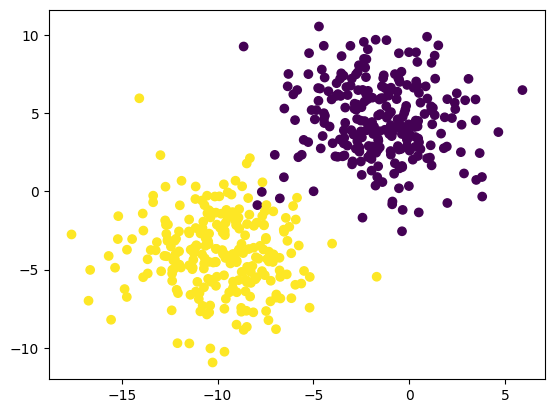

In [20]:
plt.scatter(X[:, 0], X[:, 1], c=y[:, 0])
plt.show()

In [ ]:
# Lo visualizamos
plt.scatter(X[:, 0], X[:, 1], c=y[:, 0])

In [ ]:
# Incluímos la columna de bias para poder realizar los cálculos de forma
# eficiente (bias trick)
X = ##Code##

In [ ]:
# Veamos las dimensiones de X
X.shape

In [ ]:
# Partimos en training y testing
(train_X, test_X, train_Y, test_Y) = ## Code ##

In [ ]:
# Veamos los tamaños
train_X.shape

In [ ]:
train_Y.shape

In [ ]:
test_X.shape

In [ ]:
test_Y.shape

In [ ]:
# Inicializamos nuestra matriz de pesos de forma aleatoria y el vector de
# históricos de pérdidas
W = np.random.randn(X.shape[1], 1)
losses = []
print(W)

In [ ]:
# Empezamos con el FORWARD PROPAGATION

# Como ya sabéis, es un proceso iterativo, en el que poco a poco se van
# actualizando los pesos usando el gradient descent para llegar a una mejor
# solución => épocas

n_epochs = 100
for epoch in np.arange(0, n_epochs):

  # calculamos las predicciones que da nuestra red con sus pesos actuales
  preds = ## Code ##

  # calculamos el error con respecto a las etiquetas
  error = ## Code ##

  # definimos la función de pérdidas: en este caso, el error cuadrático
  # hay una gran variedad de funciones de pérdidas distintas que iremos viendo
  loss =## Code ##

  # añadimos nuestra pérdida al vector histórico de pérdidas
  ## Code ##

  # y comencamos con el BACK PROPAGATION
  gradient = ## Code ##

  # ahora actualizamos nuestros pesos
  # pero primero, definimos nuestro learning rate
  learning_rate = 0.01
  W += ## Code ##

  # escribimos por pantalla cómo va el asunto
  ##Code##

# en cuanto acaba de entrenar, vemos lo que ha estudiado nuestra red
preds =## Code ##
print(## Code ##)

In [ ]:
# y ahora algo que os recomiendo que hagáis siempre que podáis, comprobar
# vuestras entradas, las predicciones y la curva de pérdidas
##Code##

In [ ]:
# veámoslo ahora con las predicciones
p##Code##

In [ ]:
# veamos nuestra curva de pérdidas
## Code ##

In [21]:
X = np.c_[X, np.ones((X.shape[0], 1))]

In [22]:
X.shape

(500, 3)

In [23]:
(train_X, test_X, train_Y, test_Y) = train_test_split(X, y, test_size=0.25, random_state=42)

In [24]:
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(375, 3)
(375, 1)
(125, 3)
(125, 1)


In [25]:
rng = np.random.default_rng(1)
W = rng.normal(size=(train_X.shape[1], 1))

In [28]:
losses = []

n_epochs = 100
learning_rate = 0.1
N = train_X.shape[0]

In [29]:
for epoch in np.arange(0, n_epochs):
  logits = train_X @ W
  preds = sigmoid_activation(logits)

  error = preds - train_Y
  loss = np.mean((error) ** 2)
  losses.append(loss)

  grad_logits = error * preds * (1.0 - preds)
  gradient = (train_X.T @ grad_logits) / N

  W = W - learning_rate * gradient

  print(f"Epoch: {epoch}, Loss: {loss}")

Epoch: 0, Loss: 0.8939723317835836
Epoch: 1, Loss: 0.892533430572061
Epoch: 2, Loss: 0.8910166093776152
Epoch: 3, Loss: 0.8894147920696469
Epoch: 4, Loss: 0.8877200373193095
Epoch: 5, Loss: 0.8859234188581276
Epoch: 6, Loss: 0.8840148903218973
Epoch: 7, Loss: 0.8819831336469106
Epoch: 8, Loss: 0.8798153903252002
Epoch: 9, Loss: 0.8774972753566378
Epoch: 10, Loss: 0.87501257451429
Epoch: 11, Loss: 0.8723430266361676
Epoch: 12, Loss: 0.8694680941662266
Epoch: 13, Loss: 0.866364727226255
Epoch: 14, Loss: 0.8630071293125796
Epoch: 15, Loss: 0.8593665365876051
Epoch: 16, Loss: 0.855411028132184
Epoch: 17, Loss: 0.8511053920656545
Epoch: 18, Loss: 0.8464110828846552
Epoch: 19, Loss: 0.8412863194529456
Epoch: 20, Loss: 0.8356863911315089
Epoch: 21, Loss: 0.8295642608585
Epoch: 22, Loss: 0.8228715758693492
Epoch: 23, Loss: 0.8155602135155312
Epoch: 24, Loss: 0.8075844922784786
Epoch: 25, Loss: 0.7989041554806997
Epoch: 26, Loss: 0.7894881777299679
Epoch: 27, Loss: 0.779319347773992
Epoch: 28, 

In [30]:
pred_test = predict(test_X, W)
print(classification_report(test_Y.ravel(), pred_test, digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.9310    0.9643        58
           1     0.9437    1.0000    0.9710        67

    accuracy                         0.9680       125
   macro avg     0.9718    0.9655    0.9677       125
weighted avg     0.9698    0.9680    0.9679       125



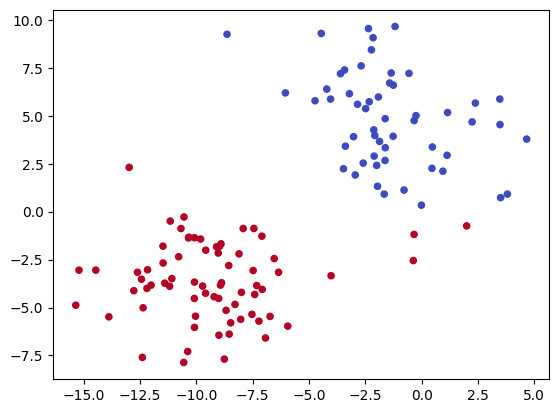

In [31]:
xs, ys = test_X[:, 0], test_X[:, 1]

plt.figure()
plt.scatter(xs, ys, c=pred_test, cmap="coolwarm", s=20)
plt.show()

## ¿Qué os parece?

### ¡¡¡Acabáis de implementar el gradient descent en una red neuronal!!!

<center><img src="https://image.ibb.co/gHQ30o/baby_party.gif" alt="baby_party" border="0">
</center>

## 2.3 Implementación del Gradient Descent en una Red Neuronal con TensorFlow

¿Os acordáis del MNIST? Es el dataset de imágenes monocromas de 28x28 píxels de dígitos del 0 al 9:

<img src="https://image.ibb.co/gkZAD8/mnist.jpg" alt="mnist" border="0" height="200">

Vamos a repetir la implementación que hicimos en el módulo anterior calculando nosotros mismos el gradiente. Además, vamos a introducir la diferencia con tenfoflow 2.x, donde no hace falta ejecutar sesiones, ni alimentar placeholders (lo hace internamente).

In [34]:
# imports necesarios
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
# importamos el dataset MNIST y cargamos los datos
from tensorflow.keras.datasets import mnist

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
El conjunto de entrenamiento tiene dimensiones:  (51000, 28, 28)
El conjunto de validación tiene dimensiones:  (9000, 28, 28)
El conjunto de test tiene dimensiones:  (10000, 28, 28)
El conjunto de entrenamiento (etiquetas) tiene dimensiones:  (51000,)
El conjunto de validación (etiquetas) tiene dimensiones:  (9000,)
El conjunto de test (etiquetas) tiene dimensiones:  (10000,)
El conjunto de entrenamiento (etiquetas) en one-hot encoding tiene dimensiones:  (51000, 10)
El conjunto de validación (etiquetas) en one-hot encoding tiene dimensiones:  (9000, 10)
El conjunto de test (etiquetas) en one-hot encoding tiene dimensiones:  (10000, 10)


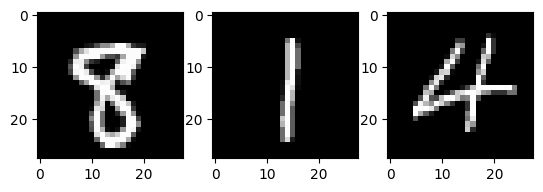

In [35]:
# Importamos el dataset que vamos a utilizar: el MNIST
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Cargamos el dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.15)

# Normalizamos el dataset
x_train = x_train / 255.
x_test = x_test / 255.
x_val= x_val / 255.

# El dataset ya está dividido en train, validation y test. Dentro de cada uno
# de estos subsets ver el número de ejemplos y las dimensiones:
print("El conjunto de entrenamiento tiene dimensiones: ", x_train.shape)
print("El conjunto de validación tiene dimensiones: ",x_val.shape)
print("El conjunto de test tiene dimensiones: ",x_test.shape)

#Hacemos lo mismo para las etiquetas.
print("El conjunto de entrenamiento (etiquetas) tiene dimensiones: ", y_train.shape)
print("El conjunto de validación (etiquetas) tiene dimensiones: ",y_val.shape)
print("El conjunto de test (etiquetas) tiene dimensiones: ",y_test.shape)

# Cada etiqueta debería ser guardada en un vector de longitud = N_CLASES, con todo 0s excepto para
# el índice que indica la clase a la que pertenece la imágen, que contiene un 1)
# Por ejemplo, si tenemos 10 clases (números del 0 al 9), y la etiqueta
# pertenece al número 5:
# label = [0 0 0 0 0 1 0 0 0 0]
#Esto se llama one-hot encodding, cambiamos el formato de la etiquetas
y_train = tf.one_hot(y_train, depth=10)
y_val = tf.one_hot(y_val, depth=10)
y_test = tf.one_hot(y_test, depth=10)

print("El conjunto de entrenamiento (etiquetas) en one-hot encoding tiene dimensiones: ", y_train.shape)
print("El conjunto de validación (etiquetas) en one-hot encoding tiene dimensiones: ",y_val.shape)
print("El conjunto de test (etiquetas) en one-hot encoding tiene dimensiones: ",y_test.shape)

# Veamos algunas de las imágenes del dataset...
# Para ello, solo necesitamos acceder a un vector de nuestra matrix y
# redimensionarlo a 28x28
plt.subplot(131)
plt.imshow(np.reshape(x_train[0, :], (28, 28)), cmap='gray')
plt.subplot(132)
plt.imshow(np.reshape(x_train[27500, :], (28, 28)), cmap='gray')
plt.subplot(133)
plt.imshow(np.reshape(x_train[41000, :], (28, 28)), cmap='gray')

In [36]:
# Ya hemos visto un poco en qué consiste el dataset del MNIST.
# Reducimos tamaño de entrenamiento para que vaya más rápido
size_train=1000
x_train=x_train[0:size_train]
y_train= y_train[0:size_train]
# Convertimos las imágenes a vectores, dado que aún no hemos visto cómo podemos implementar un modelo que trabaje con imágenes
x_train = tf.reshape(x_train, shape=(size_train, -1)) # Nuestros datos ya están en formato [N_instancias, variables] (nº instancias, 784 (28+28) pixels).
x_val = tf.reshape(x_val, shape=(9000, -1)) # Nuestros datos ya están en formato [N_instancias, variables] ((nº instancias, 784 (28*28) pixels).
x_test = tf.reshape(x_test, shape=(10000, -1)) # Nuestros datos ya están en formato [N_instancias, variables] ((nº instancias, 784 (28+28) pixels).

In [37]:
# parámetros
learning_rate = 0.01
n_epochs = 10
batch_size = 100

In [38]:
# Cuando ejecutamos en grafo, lo primero es que creemos el placeholder
# para nuestros datos de entrada y salida. En este caso, la entrada va a ser
# un conjunto de vectores de tamaño 768 (vamos a pasarle varias imágenes
# a la vez a nuestro regresor, de esta forma, cuando calcule el gradiente
# se basará en varias imágenes, con lo que la  estimación será más precisa
# que si utilizase solo una). La salida tendrá dimensión 10, que son las 10
# clases en las que podemos clasificar

n_input = 784  # Número de características de los datos: nº píxels de la imagen
n_output = 10  # Número de clases: del 0 al 9

# Creamos el placeholder de entrada a nuestro algoritmo
net_input = tf.
# Necesitamos también un placeholder para la etiqueta de la imagen, con la que
# compararemos nuestra predicción
y_true = tf.placeholder(tf.float32, [None, n_output])

# Creamos las variables W y b para el entrenamiento. Recordad y = W*x + b
W = tf.Variable(tf.zeros([n_input, n_output]))
b = tf.Variable(tf.zeros([n_output]))

# Como la salida es multiclase, necesitamos una función que nos devuelva las
# probabilidades de una imagen de pertenecer a cada de las posibles clases. Lo
# ideal, además, es que estas probabilidades sumasen 1.
# Por ejemplo, si metemos una imagen con un 5, una posible salida sería:
# [0.05 0.05 0.05 0.05 0.05 0.55 0.05 0.05 0.05 0.05]
# cuya suma de probabilidades es 1, y la clase con la mayor probabilidad es 5.
# Aplicamos la función softmax para normalizar las probabilidades de salida
net_output = tf.nn.softmax(tf.matmul(net_input, W) + b)
print("Tamaño del input es: {}".format(net_input)) # Dimensiones  axb
print("Tamaño los pesos es: {}".format(net_output)) # El prodcuto tendrá dimensiones  axc

AttributeError: module 'tensorflow' has no attribute 'placeholder'

In [ ]:
# Ahora, definimos nuestra función de pérdidas: esta vez, la cros-entropía
# no os preocupéis, la veremos en detalle en la próxima sesión
# a veces la llaman loss, a veces cost => es lo mismo
cost = tf.reduce_mean(-tf.reduce_sum(y_true*tf.log(net_output), axis=1))

#### calculamos los gradientes (gradient descent) ####
## Code ##
# definimos las operaciones para actualizar los pesos con los gradientes calculados
# y el learning rate
new_W = ## Code ##
new_b = ## Code ##

#### Esto lo calculaba la siguietne función implementada en la práctica anterior ####
#optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

#Definimos el número de batches totales
total_batch = size_train / batch_size

# inicializamos las variables
init = tf.global_variables_initializer()

# para almacenar el histórico de costes
costs = []
# empezamos la sesión
with tf.Session() as sess:
    sess.run(init)

    # entrenamiento de nuestra red
    for epoch in range(n_epochs):
        avg_cost = 0.
        # y si en vez de actualizar los pesos para cada imagen, lo hacemos
        # de X en X imágenes?
        for sample_i in range(0,x_train.shape[0],batch_size):
            sample_x = x_train[sample_i:sample_i+batch_size]
            sample_y = y_train[sample_i:sample_i+batch_size]
            # ejecutamos la optimización
            _, _, c = ##code ##
            # calculamos el coste teniendo en cuenta los batches que hay
            avg_cost += ##code ##

        # guardamos nuestro coste en el histórico
        ##code ##

        # imprimimos las iteraciones
        print("[{}] cost: {}".format(epoch, avg_cost))

    print("Entrenamiento finalizado!!")

    # comprobamos lo que ha aprendido nuestra red
    correct_prediction = tf.equal(tf.argmax(net_output, 1), tf.argmax(y_true, 1))

    # calculamos el accuracy (precisión)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({net_input: x_test.eval(), y_true: y_test.eval()}))

In [ ]:
# veamos nuestra función de pérdidas con respecto a las épocas ejecutadas
  ## Code##

#¿Y cómo haríamos esto con TF 2.0? ¡Veámoslo!

In [ ]:
# Importamos el dataset que vamos a utilizar: el MNIST
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Cargamos el dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.15)

# Normalizamos el dataset
x_train = x_train / 255.
x_test = x_test / 255.
x_val= x_val / 255.

# El dataset ya está dividido en train, validation y test. Dentro de cada uno
# de estos subsets ver el número de ejemplos y las dimensiones:
print("El conjunto de entrenamiento tiene dimensiones: ", x_train.shape)
print("El conjunto de validación tiene dimensiones: ",x_val.shape)
print("El conjunto de test tiene dimensiones: ",x_test.shape)

#Hacemos lo mismo para las etiquetas.
print("El conjunto de entrenamiento (etiquetas) tiene dimensiones: ", y_train.shape)
print("El conjunto de validación (etiquetas) tiene dimensiones: ",y_val.shape)
print("El conjunto de test (etiquetas) tiene dimensiones: ",y_test.shape)

# Cada etiqueta debería ser guardada en un vector de longitud = N_CLASES, con todo 0s excepto para
# el índice que indica la clase a la que pertenece la imágen, que contiene un 1)
# Por ejemplo, si tenemos 10 clases (números del 0 al 9), y la etiqueta
# pertenece al número 5:
# label = [0 0 0 0 0 1 0 0 0 0]
#Esto se llama one-hot encodding, cambiamos el formato de la etiquetas
y_train = tf.one_hot(y_train, depth=10)
y_val = tf.one_hot(y_val, depth=10)
y_test = tf.one_hot(y_test, depth=10)

print("El conjunto de entrenamiento (etiquetas) en one-hot encoding tiene dimensiones: ", y_train.shape)
print("El conjunto de validación (etiquetas) en one-hot encoding tiene dimensiones: ",y_val.shape)
print("El conjunto de test (etiquetas) en one-hot encoding tiene dimensiones: ",y_test.shape)

# Veamos algunas de las imágenes del dataset...
# Para ello, solo necesitamos acceder a un vector de nuestra matrix y
# redimensionarlo a 28x28
plt.subplot(131)
plt.imshow(np.reshape(x_train[0, :], (28, 28)), cmap='gray')
plt.subplot(132)
plt.imshow(np.reshape(x_train[27500, :], (28, 28)), cmap='gray')
plt.subplot(133)
plt.imshow(np.reshape(x_train[41000, :], (28, 28)), cmap='gray')

In [ ]:
# Ya hemos visto un poco en qué consiste el dataset del MNIST.
# Reducimos tamaño de entrenamiento para que vaya más rápido
size_train=1000
x_train=x_train[0:size_train]
y_train= y_train[0:size_train]
# Convertimos las imágenes a vectores, dado que aún no hemos visto cómo podemos implementar un modelo que trabaje con imágenes
x_train = tf.reshape(x_train, shape=(size_train, -1)) # Nuestros datos ya están en formato [N_instancias, variables] (nº instancias, 784 (28+28) pixels).
x_val = tf.reshape(x_val, shape=(9000, -1)) # Nuestros datos ya están en formato [N_instancias, variables] ((nº instancias, 784 (28+28) pixels).
x_test = tf.reshape(x_test, shape=(10000, -1)) # Nuestros datos ya están en formato [N_instancias, variables] ((nº instancias, 784 (28+28) pixels).

Por último, debemos fijarnos en los tipos de datos con los que estamos trabajando. TF exige que los tipos coincidan, si no, se queja :(

In [ ]:
print(x_train.dtype)
print(x_test.dtype)
print(y_train.dtype)
print(y_test.dtype)

In [ ]:
# convertimos las etiquetas a float64
y_train =   ## Code##
y_test =   ## Code##

In [ ]:
print(x_train.dtype)
print(x_test.dtype)
print(y_train.dtype)
print(y_test.dtype)

¡Perfecto! Ahora sí que estamos preparados. Si no hubieramos hecho esta conversión, hubieramos obtenido un error como este:



```
---------------------------------------------------------------------------
InvalidArgumentError                      Traceback (most recent call last)
<ipython-input-38-4d4399931cbf> in <module>()
     20         # no os preocupéis, la veremos en detalle en la próxima sesión
     21         # a veces la llaman loss, a veces cost => es lo mismo
---> 22         cost = tf.reduce_mean(-tf.reduce_sum(batch_ys*tf.math.log(pred), axis=1))
     23
     24         # calculamos los gradientes (gradient descent)

4 frames
/usr/local/lib/python3.6/dist-packages/six.py in raise_from(value, from_value)

InvalidArgumentError: cannot compute Mul as input #1(zero-based) was expected to be a uint8 tensor but is a double tensor [Op:Mul]
```



Nos creamos ahora el iterador para que recorra nuestro dataset. Podéis leer más sobre `tf.data` aquí: https://www.tensorflow.org/guide/data

In [ ]:
train_ds =   ## Code##
train_ds =   ## Code##

# para el conjunto de test no vamos a necesitar el dataloader porque
# no vamos a procesar los datos por batches, sino todos a la vez, así
# que utilizaremos x_test y y_test.
# Si fuesemos a procesarlo por batches, se haría así:
# test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
# test_ds = test_ds.batch(batch_size)

In [ ]:
# cuantas iteraciones habrá por época?
# en una época se tienen que ver todos los elementos del dataset, y estamos
# pasándole los elementos de 100 en 100, así que habrá 60000 / 100 = 600 épocas
total_batch =  ## Code##
print(total_batch)

In [ ]:
# y creamos las variables W y b para el entrenamiento
W = tf.zeros([784, 10], tf.double)
b = tf.zeros([10], tf.double)

# para almacenar el histórico de costes
costs = []
# entrenamiento de nuestra red
for epoch in range(n_epochs):
    avg_cost = 0.

    # y si en vez de actualizar los pesos para cada imagen, lo hacemos
    # de X en X imágenes?
    for batch_xs, batch_ys in train_ds:
        # empezamos con la optimización

        # haremos uso de tf.GradientTape, que lleva un control de las variables
        # para poder calcular sus gradientes
        with tf.GradientTape() as tape:
            # le indicamos que "vigile" las variables a optimizar
            tape.watch(W)
            tape.watch(b)

            # ejecutamos el modelo (a veces, lo llamamos net_output o pred, es lo mismo)
            pred = tf.nn.softmax(tf.matmul(batch_xs, W) + b)

            # ahora, definimos nuestra función de pérdidas: esta vez, la cros-entropía
            # no os preocupéis, la veremos en detalle en la próxima sesión
            # a veces la llaman loss, a veces cost => es lo mismo
            cost = tf.reduce_mean(-tf.reduce_sum(batch_ys*tf.math.log(pred), axis=1))

            # calculamos los gradientes (gradient descent)
            ## code ##

            # definimos las operaciones para actualizar los pesos con los gradientes calculados
            # y el learning rate
            W = ## code ##
            b = ## code ##

        # calculamos el coste teniendo en cuenta los batches que hay
        avg_cost += ## code ##

    # guardamos nuestro coste en el histórico
    ## code ##

    # imprimimos las iteraciones
    print("[{}] cost: {}".format(epoch, avg_cost))

print("Entrenamiento finalizado!!")

In [ ]:
# comprobamos lo que ha aprendido nuestra red
pred = ## Code##
correct_prediction =   ## Code##

# calculamos el accuracy (precisión)
accuracy =   ## Code##
print("Accuracy:", accuracy.numpy())

In [ ]:
# veamos nuestra función de pérdidas con respecto a las épocas ejecutadas
  ## Code##

In [39]:
import tensorflow as tf

In [40]:
tf.__version__

'2.19.0'

In [41]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 784).astype(np.float32) / 255.0
x_test = x_test.reshape(-1, 784).astype(np.float32) / 255.0
y_train = tf.one_hot(y_train, depth=10)
y_test = tf.one_hot(y_test, depth=10)

In [69]:
lr = 0.5
epochs = 2
batch_size = 100
n_input = 784
n_output = 10
n_hidden = 128

In [57]:
W1 = tf.Variable(tf.random.normal([n_input, n_hidden]), stddev=0.1)
b1 = tf.Variable(tf.zeros([n_hidden]))
W2 = tf.Variable(tf.random.normal([n_hidden, n_output]), stddev=0.1)
b2 = tf.Variable(tf.zeros([n_output]))

In [58]:
def model(X):
  h = tf.nn.relu(tf.matmul(X, W1) + b1)
  out = tf.nn.softmax(tf.matmul(h, W2) + b2)
  return out

In [59]:
optimizer = tf.optimizers.SGD(lr)

In [60]:
for epoch in range(epochs):
  idx = np.random.permutation(len(x_train))
  for i in range(0, len(x_train), batch_size):
    Xb = x_train[idx[i: i+batch_size]]
    Yb = tf.gather(y_train, idx[i: i+batch_size])
    with tf.GradientTape() as tape:
      pred = model(Xb)
      loss = -tf.reduce_mean(tf.reduce_sum(Yb * tf.math.log(pred + 1e-9), axis=1))
    grads = tape.gradient(loss, [W1, b1, W2, b2])
    optimizer.apply_gradients(zip(grads, [W1, b1, W2, b2]))
  acc = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(model(x_test), axis=1), tf.argmax(y_test, axis=1)), tf.float32))
  print("Epoch: {}, Loss: {}, Accuracy: {}".format(epoch, loss.numpy(), acc.numpy()))

Epoch: 0, Loss: 10.739619255065918, Accuracy: 0.482699990272522
Epoch: 1, Loss: 7.6373982429504395, Accuracy: 0.6516000032424927
Epoch: 2, Loss: 5.5955095291137695, Accuracy: 0.6603000164031982
Epoch: 3, Loss: 3.191713809967041, Accuracy: 0.8310999870300293
Epoch: 4, Loss: 4.316195011138916, Accuracy: 0.8440999984741211
Epoch: 5, Loss: 1.2875792980194092, Accuracy: 0.9344000220298767
Epoch: 6, Loss: 0.49940940737724304, Accuracy: 0.942799985408783
Epoch: 7, Loss: 0.8508636355400085, Accuracy: 0.9480999708175659
Epoch: 8, Loss: 0.9128919243812561, Accuracy: 0.9534000158309937
Epoch: 9, Loss: 0.004303947556763887, Accuracy: 0.9552000164985657


In [62]:
np.savez("simple_nn_weights.npz", W1=W1.numpy(), b1=b1.numpy(), W2=W2.numpy(), b2=b2.numpy())

In [88]:
class SimpleNN(tf.Module):
  def __init__(self):
    super().__init__()
    self.W1 = tf.Variable(tf.random.normal([n_input, n_hidden]), stddev=0.1)
    self.b1 = tf.Variable(tf.zeros([n_hidden]))
    self.W2 = tf.Variable(tf.random.normal([n_hidden, n_output]), stddev=0.1)
    self.b2 = tf.Variable(tf.zeros([n_output]))

  @tf.function(input_signature=[tf.TensorSpec(shape=[None, 784], dtype=tf.float32, name="x")])
  def __call__(self, X):
    h = tf.nn.relu(tf.matmul(X, self.W1) + self.b1)
    out = tf.nn.softmax(tf.matmul(h, self.W2) + self.b2)
    return out

In [89]:
model = SimpleNN()

In [90]:
optimizer = tf.optimizers.SGD(lr)

In [91]:
for epoch in range(epochs):
    idx = np.random.permutation(len(x_train))
    for i in range(0, len(x_train), batch_size):
        Xb = x_train[idx[i:i+batch_size]]
        Yb = tf.gather(y_train, idx[i:i+batch_size])
        with tf.GradientTape() as tape:
            pred = model(Xb)
            loss = -tf.reduce_mean(tf.reduce_sum(Yb * tf.math.log(pred + 1e-9), axis=1))
        grads = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))

In [92]:
tf.saved_model.save(model, "simple_nn_tf")

In [93]:
del model

In [94]:
model = tf.saved_model.load("simple_nn_tf")

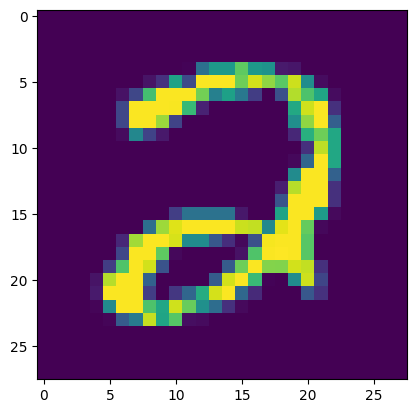

In [116]:
idx = 106
img = x_test[idx:idx+1]

plt.imshow(img.reshape(28, 28))
plt.show()

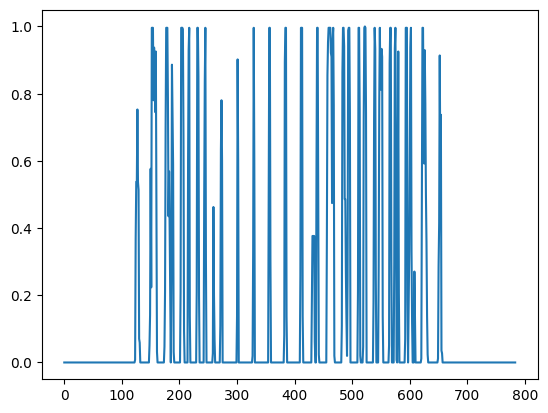

In [117]:
plt.plot(img[0])
plt.show()

In [96]:
img.shape

(1, 784)

In [112]:
pred = tf.argmax(model(img), axis=1).numpy()[0]

In [113]:
pred

np.int64(4)

¡Ahí lo tenéis! Hemos llegado al mismo sitio de una forma más "sencilla e intuitiva". Para esto surgió TF2, pero es importante que sepáis que hace por debajo! A partir de ahora trabajaremos con TF2 y así tensorflow ejecutará los grafos por nosotros

## ¡Y esto es todo amigos!

<img src="https://image.ibb.co/jZEXD8/thats_all_folks.gif" alt="thats_all_folks" border="0">

Mañana veremos todo lo relacionado con el proceso de aprendizaje de las redes neuronales: los diferentes tipos de gradient descent, las funciones de pérdidas y activacion, el learning rate, el batch size, y la normalización.

## ¡Así que cargad las pilas! ;-)